In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# dynamic window averaging
def dwa(data_t):
    result = list()
    stack = list()
    for i in range(len(data_t)):
        element = data_t[i]
        if len(stack) > 1 and (abs(np.mean(stack)) * 2 <= abs(element) or abs(np.mean(stack)) * 0.5 >= abs(element)):
            average_for_stack = np.mean(stack)
            stack = [average_for_stack] * len(stack)
            result.extend(stack)
            stack.clear()
            stack.append(element)
        else:
            stack.append(element)
    if stack:
        average_for_stack = np.mean(stack)
        stack = [average_for_stack] * len(stack)        
        result.extend(stack)
    
    return result

In [26]:
file = pd.read_excel('D:/Learning/pythonich/Работа_с_библиотеками/for_diploma/magnitka.xlsx', sheet_name='3000')
data_t = file['T']
data_z = file['Z'] - min(file['Z'])
data_new_t = dwa(data_t)

Text(0, 0.5, 'Относительная высота, м')

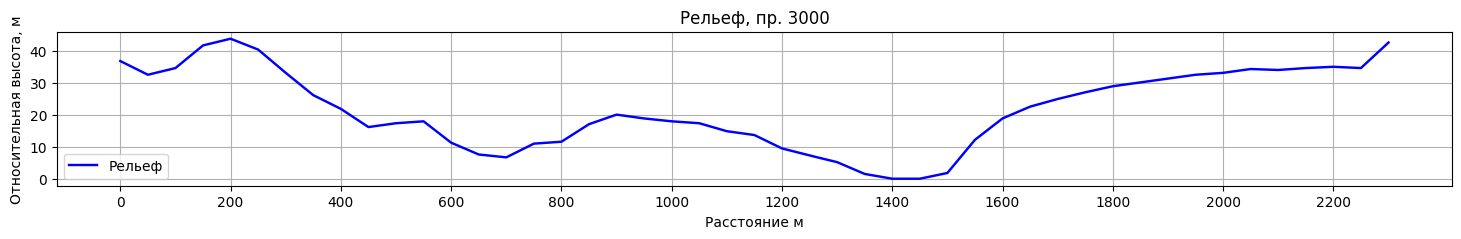

In [27]:
plt.figure(figsize=(18, 2))
# plt.plot(file['POINT(LAT)'], data_new_t, color='green', linewidth=1.75, label='Осредненное поле')
#plt.plot(file['POINT(LAT)'], data_t, color='red', linestyle='-', linewidth=1, label='Измеренное поле')
plt.plot(file['POINT(LAT)'], data_z, color='blue', linewidth=1.75, label='Рельеф')
plt.legend()
plt.grid()
plt.title('Рельеф, пр. 3000')
plt.xticks(range(0, max(file['POINT(LAT)']), 200))
plt.xlabel('Расстояниe м')
plt.ylabel('Относительная высота, м')

In [5]:
print(sum(data_t - data_new_t))

-3.2862601528904634e-13
